In [59]:
import os
import csv
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# read csv
def make_df(path): 
    df = pd.read_csv(path)
    return df

In [61]:
# analyze the general data
path = Path("Crime_Report.csv")
starting_df = pd.read_csv(path)
directory = os.path.dirname(path)
starting_df.head()

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_83293/3352553725.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  starting_df = pd.read_csv(path)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN


In [62]:
# check columns
starting_df.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [63]:
# reduce the data to the columns of focus
reduced_starting = starting_df.loc[:, ["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', "Report Date", "Category Description"]]
reduced_starting.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date,Category Description
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013,Rape
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016,Rape


In [64]:
# link columns to create a series
date_crime = pd.concat([starting_df['Occurred Date'], starting_df['Highest Offense Description']], axis=1)

In [65]:
crimes = date_crime['Highest Offense Description'].unique()

In [66]:
# find theft crimes
filtered_theft_crime = date_crime[date_crime['Highest Offense Description'].str.contains('theft', case=False)]

In [67]:
# find bulglary crimes
filtered_burgl_crime = date_crime[date_crime['Highest Offense Description'].str.contains('burglary', case=False)]

In [68]:
# link theft and bulglary crimes
all_theft_crimes = pd.concat([filtered_theft_crime, filtered_burgl_crime], ignore_index=True)

In [69]:
# find all theft crimes to prepare to organize by season
all_theft_crimes['Occurred Date'] = pd.to_datetime(all_theft_crimes['Occurred Date'], format='mixed')

In [70]:
# organize theft by season
all_theft_crimes['Season'] = pd.cut(
    all_theft_crimes['Occurred Date'].dt.dayofyear,
    bins= [0, 79, 171, 264, 355, 365],
    labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],
    ordered=False)

In [71]:
# drop the date column
season_theft_crimes = all_theft_crimes.drop(columns=['Occurred Date'])

In [72]:
all_theft_crimes.head()

,Occurred Date,Highest Offense Description,Season
0,2021-04-08,IDENTITY THEFT,Spring
1,2004-01-02,THEFT,Winter
2,2009-07-29,IDENTITY THEFT,Summer
3,2017-09-23,THEFT FROM PERSON,Fall
4,2010-12-24,IDENTITY THEFT,Winter


In [73]:
season_theft_crimes.head()

,Highest Offense Description,Season
0,IDENTITY THEFT,Spring
1,THEFT,Winter
2,IDENTITY THEFT,Summer
3,THEFT FROM PERSON,Fall
4,IDENTITY THEFT,Winter


In [74]:
column_names = season_theft_crimes.columns

# Print column names and make a variable for them
column_names

Index(['Highest Offense Description', 'Season'], dtype='object')

In [75]:
season_theft_crimes_count = season_theft_crimes.groupby('Highest Offense Description').count()
season_theft_crimes_count.head()

,Season
Highest Offense Description,
ATT AUTO THEFT,307
ATT BURGLARY NON RESIDENCE,156
ATT BURGLARY OF RESIDENCE,457
ATT THEFT,206
AUTO THEFT,62113


In [76]:
column_names = season_theft_crimes_count.columns

# Print column names
print(column_names)

Index(['Season'], dtype='object')


In [77]:
value_counts = season_theft_crimes['Highest Offense Description'].value_counts()

# Print the value counts
print(value_counts)

Highest Offense Description
BURGLARY OF VEHICLE                              255338
THEFT                                            230215
BURGLARY OF RESIDENCE                             82257
AUTO THEFT                                        62144
THEFT BY SHOPLIFTING                              54716
BURGLARY NON RESIDENCE                            41436
IDENTITY THEFT                                    28899
THEFT OF BICYCLE                                  24329
THEFT OF SERVICE                                  14942
THEFT FROM AUTO                                   10748
THEFT OF LICENSE PLATE                            10241
THEFT FROM PERSON                                  9253
BURGLARY OF VEH-NO SUSPECT/FU                      8550
MAIL THEFT                                         7359
BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT      6387
THEFT OF AUTO PARTS                                5495
THEFT CATALYTIC CONVERTER                          4919
THEFT OF TRAILER    

In [78]:
series = pd.Series(value_counts)

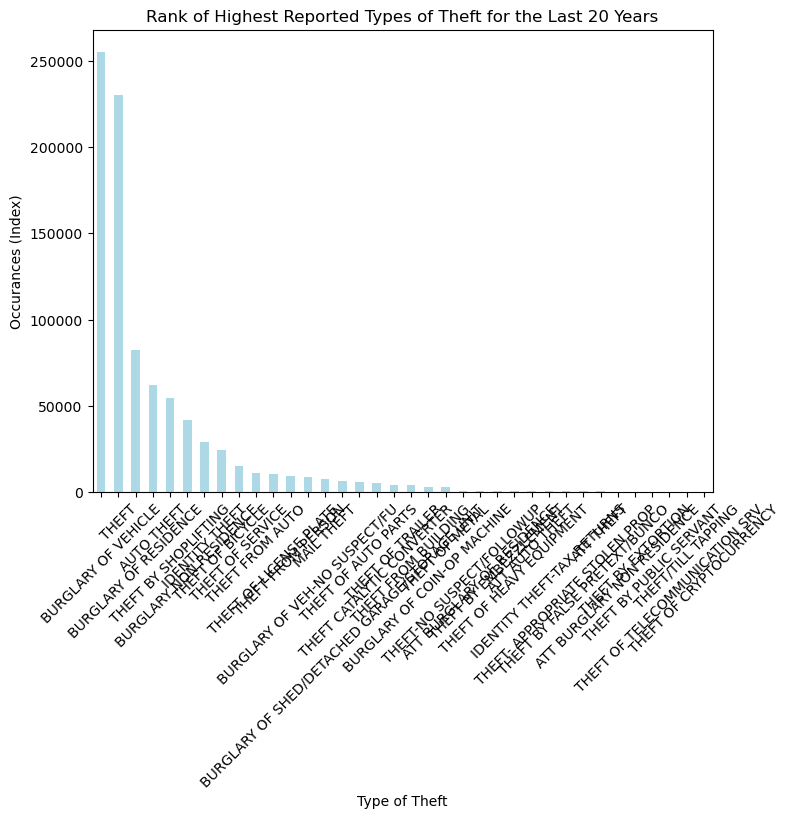

In [79]:
# Transpose the Series (swap rows and columns)
transposed_data = value_counts.transpose()


# Create the bar chart
plt.figure(figsize=(8, 6))  # Optional: Set figure size
transposed_data.plot(kind='bar', color='lightblue')  # color argument is optional

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Set rotation angle (adjust as needed)

# Add labels and title (optional)
plt.xlabel('Type of Theft')  # Adjust label based on your Series
plt.ylabel('Occurances (Index)')
plt.title('Rank of Highest Reported Types of Theft for the Last 20 Years')

# Customize x-axis ticks and grid (optional)
#plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add dashed grid lines on y-axis

# Display the chart
plt.show()

In [80]:
filtered_value_counts = value_counts[value_counts > 10000]

# Print the filtered Series
print(filtered_value_counts)

Highest Offense Description
BURGLARY OF VEHICLE       255338
THEFT                     230215
BURGLARY OF RESIDENCE      82257
AUTO THEFT                 62144
THEFT BY SHOPLIFTING       54716
BURGLARY NON RESIDENCE     41436
IDENTITY THEFT             28899
THEFT OF BICYCLE           24329
THEFT OF SERVICE           14942
THEFT FROM AUTO            10748
THEFT OF LICENSE PLATE     10241
Name: count, dtype: int64


In [81]:
season_theft_crimes_res = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'BURGLARY OF RESIDENCE']

In [82]:
season_theft_crimes_res.head()

,Highest Offense Description,Season
476823,BURGLARY OF RESIDENCE,Summer
476825,BURGLARY OF RESIDENCE,Fall
476826,BURGLARY OF RESIDENCE,Fall
476827,BURGLARY OF RESIDENCE,Summer
476829,BURGLARY OF RESIDENCE,Summer


In [83]:
season_theft_crimes_res.index.name = 'Index'

In [84]:
season_theft_crimes_res.head()

,Highest Offense Description,Season
Index,,
476823,BURGLARY OF RESIDENCE,Summer
476825,BURGLARY OF RESIDENCE,Fall
476826,BURGLARY OF RESIDENCE,Fall
476827,BURGLARY OF RESIDENCE,Summer
476829,BURGLARY OF RESIDENCE,Summer


In [85]:
season_theft_crimes_res.index.is_monotonic_increasing

True

In [86]:
season_theft_crimes_res_gb = season_theft_crimes_res.groupby('Season')['Highest Offense Description'].count()

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_83293/473653629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_res_gb = season_theft_crimes_res.groupby('Season')['Highest Offense Description'].count()


In [87]:
season_theft_crimes_res_gb

Season
Fall      21537
Spring    20992
Summer    20426
Winter    19240
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Occurrances')

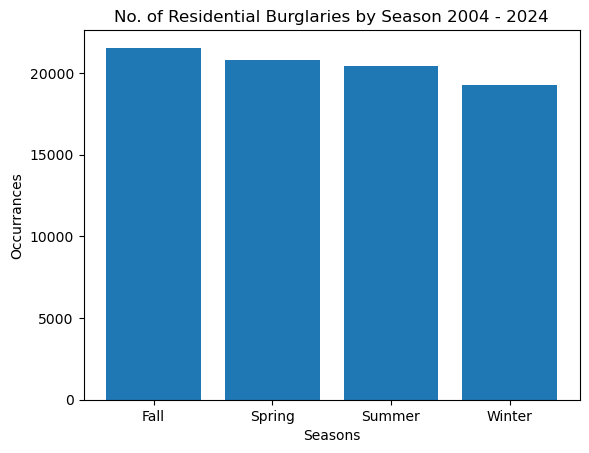

In [88]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [21537, 20813, 20426, 19239]
plt.bar(Seasons, Occurrances)

# Set chart title and labels
plt.title('No. of Residential Burglaries by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Occurrances')

In [89]:
season_theft_crimes_shoplift = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'THEFT BY SHOPLIFTING']

In [90]:
season_theft_crimes_shoplift_group = season_theft_crimes_shoplift.groupby('Season')['Highest Offense Description'].count()
season_theft_crimes_shoplift_group

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_83293/1970120593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_shoplift_group = season_theft_crimes_shoplift.groupby('Season')['Highest Offense Description'].count()


Season
Fall      13274
Spring    13880
Summer    13793
Winter    13741
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

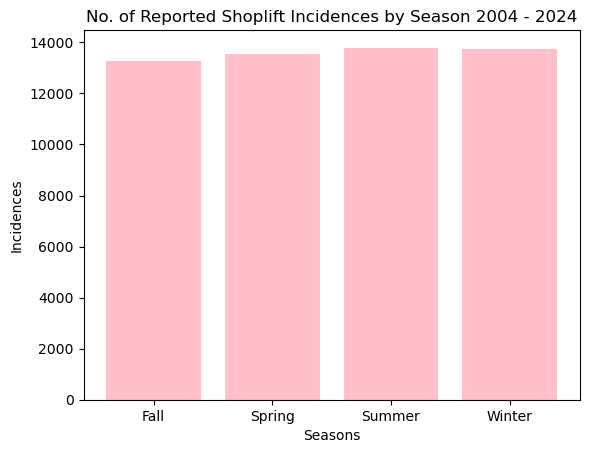

In [91]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [13273, 13554, 13791, 13730]
Colors = ['pink']
plt.bar(Seasons, Occurrances, color=Colors)

# Set chart title and labels
plt.title('No. of Reported Shoplift Incidences by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Incidences')

In [92]:
num_rows_theft_rs = len(season_theft_crimes_res)
print(num_rows_theft_rs) 

82257


In [93]:
num_rows_shoplift = len(season_theft_crimes_shoplift)
print(num_rows_shoplift)  

54716


In [94]:
season_theft_crimes_BICYCLE = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'THEFT OF BICYCLE']

In [95]:
season_theft_crimes_BICYCLE_gb = season_theft_crimes_BICYCLE.groupby('Season')['Highest Offense Description'].count()

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_83293/689256341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_BICYCLE_gb = season_theft_crimes_BICYCLE.groupby('Season')['Highest Offense Description'].count()


In [96]:
season_theft_crimes_BICYCLE_gb

Season
Fall      6285
Spring    6173
Summer    6789
Winter    5074
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

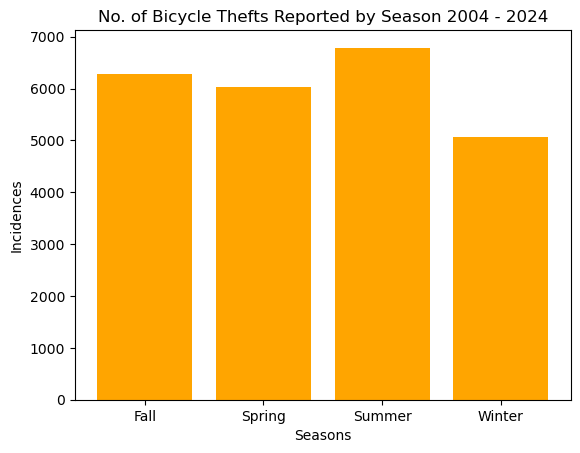

In [97]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [6284, 6039, 6789, 5072]
Colors = ['orange']
plt.bar(Seasons, Occurrances, color=Colors)

# Set chart title and labels
plt.title('No. of Bicycle Thefts Reported by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Incidences')

In [98]:
season_theft_crimes_IDENTITY = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'IDENTITY THEFT']

In [99]:
season_theft_crimes_IDENTITY_gb = season_theft_crimes_IDENTITY.groupby('Season')['Highest Offense Description'].count()

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_83293/3953253815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_IDENTITY_gb = season_theft_crimes_IDENTITY.groupby('Season')['Highest Offense Description'].count()


In [100]:
season_theft_crimes_IDENTITY_gb

Season
Fall      6391
Spring    7758
Summer    6503
Winter    8230
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

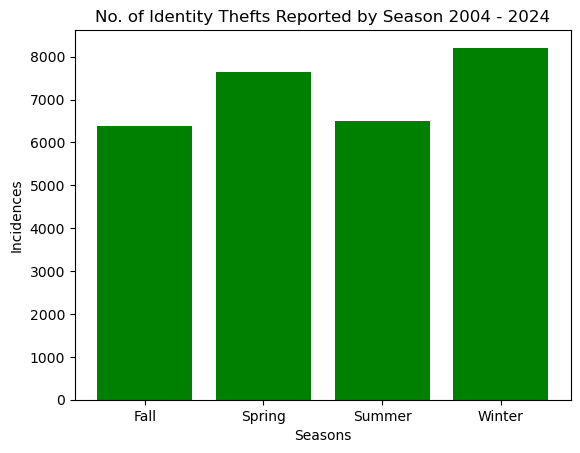

In [101]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [6380, 7645, 6494, 8208]
Colors = ['green']
plt.bar(Seasons, Occurrances, color=Colors)

# Set chart title and labels
plt.title('No. of Identity Thefts Reported by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Incidences')

In [102]:
#CHI SQUARE TEST FOR IDENTITY THEFT BY SEASON
from scipy.stats import chi2_contingency


# Your data from the identity theft by season chart
data = np.array([6380, 7645, 6494, 8208])  # Fall, Spring, Summer, Winter

# As we're dealing with one categorical group only, we need to generate expected frequencies assuming no effect of seasons
total = data.sum()
expected = np.full(shape=data.shape, fill_value=total / 4)

# Chi-square test
chi2, p_value = chi2_contingency([data, expected])[:2]

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 164.89333824893055
p-value: 1.6107138924223533e-35


In [103]:
#CHI SQUARE TEST NO. OF SHOPLIFT INCIDINCES


# Assuming your data is already summarized by season
data = {
    'Season': ['Fall', 'Spring', 'Summer', 'Winter'],
    'Shoplift Incidences': [13273, 13554, 13791, 13730]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(index=df['Season'], columns='count', values=df['Shoplift Incidences'], aggfunc='sum')

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")


Chi-Square Statistic: 0.0
p-value: 1.0


In [104]:
# Observed frequencies of residential burglaries in each season
data = np.array([21537, 20813, 20426, 19239])  # Fall, Spring, Summer, Winter

# As we're dealing with one categorical group only, we need to generate expected frequencies assuming no effect of seasons
total = data.sum()
expected = np.full(shape=data.shape, fill_value=total / 4)

# Performing the Chi-square test
chi2, p_value = chi2_contingency([data, expected])[:2]

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 68.10559048133163
p-value: 1.0860061995797653e-14


In [105]:
data = np.array([6284, 6039, 6789, 5072])  # Fall, Spring, Summer, Winter

# Calculate the expected counts assuming no seasonal effect
total = data.sum()
expected = np.full(shape=data.shape, fill_value=total / 4)  # Equal distribution among seasons

# Conducting the Chi-square test
chi2, p_value, dof, expected = chi2_contingency([data, expected])

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 132.9372089925216
p-value: 1.259058803975753e-28


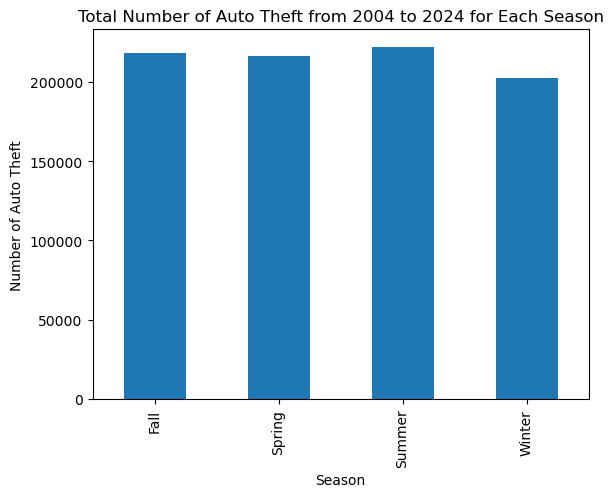

In [106]:
# Filter data for the years 2003 to 2023
filtered_years = all_theft_crimes[(all_theft_crimes['Occurred Date'].dt.year >= 2003) & (all_theft_crimes['Occurred Date'].dt.year <= 2023)]

# Group by season and count occurrences
season_counts = filtered_years.groupby('Season', observed=False).size()

# Plot the data as a bar plot
season_counts.plot(kind='bar')

# Add labels and title
plt.title('Total Number of Auto Theft from 2003 to 2023 for Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Auto Theft')

# Show the plot
plt.show()

In [107]:
total = season_counts.sum()
expected = np.full(shape=season_counts.shape, fill_value=total / 4)  # Equal distribution among seasons

# Conducting the Chi-square test
chi2, p_value, dof, expected = chi2_contingency([season_counts.values, expected])

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 518.7774667282409
p-value: 4.0660226006107926e-112
